<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43463 entries, 0 to 43462
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43463 non-null  int64  
 1   UTC             43463 non-null  int64  
 2   Temperature[C]  43463 non-null  float64
 3   Humidity[%]     43463 non-null  float64
 4   TVOC[ppb]       43463 non-null  int64  
 5   eCO2[ppm]       43463 non-null  int64  
 6   Raw H2          43463 non-null  int64  
 7   Raw Ethanol     43463 non-null  int64  
 8   Pressure[hPa]   43463 non-null  float64
 9   PM1.0           43463 non-null  float64
 10  PM2.5           43463 non-null  float64
 11  NC0.5           43463 non-null  float64
 12  NC1.0           43463 non-null  float64
 13  NC2.5           43463 non-null  float64
 14  CNT             43463 non-null  int64  
 15  Fire Alarm      43463 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 5.3 MB
None
         Unnamed: 0       

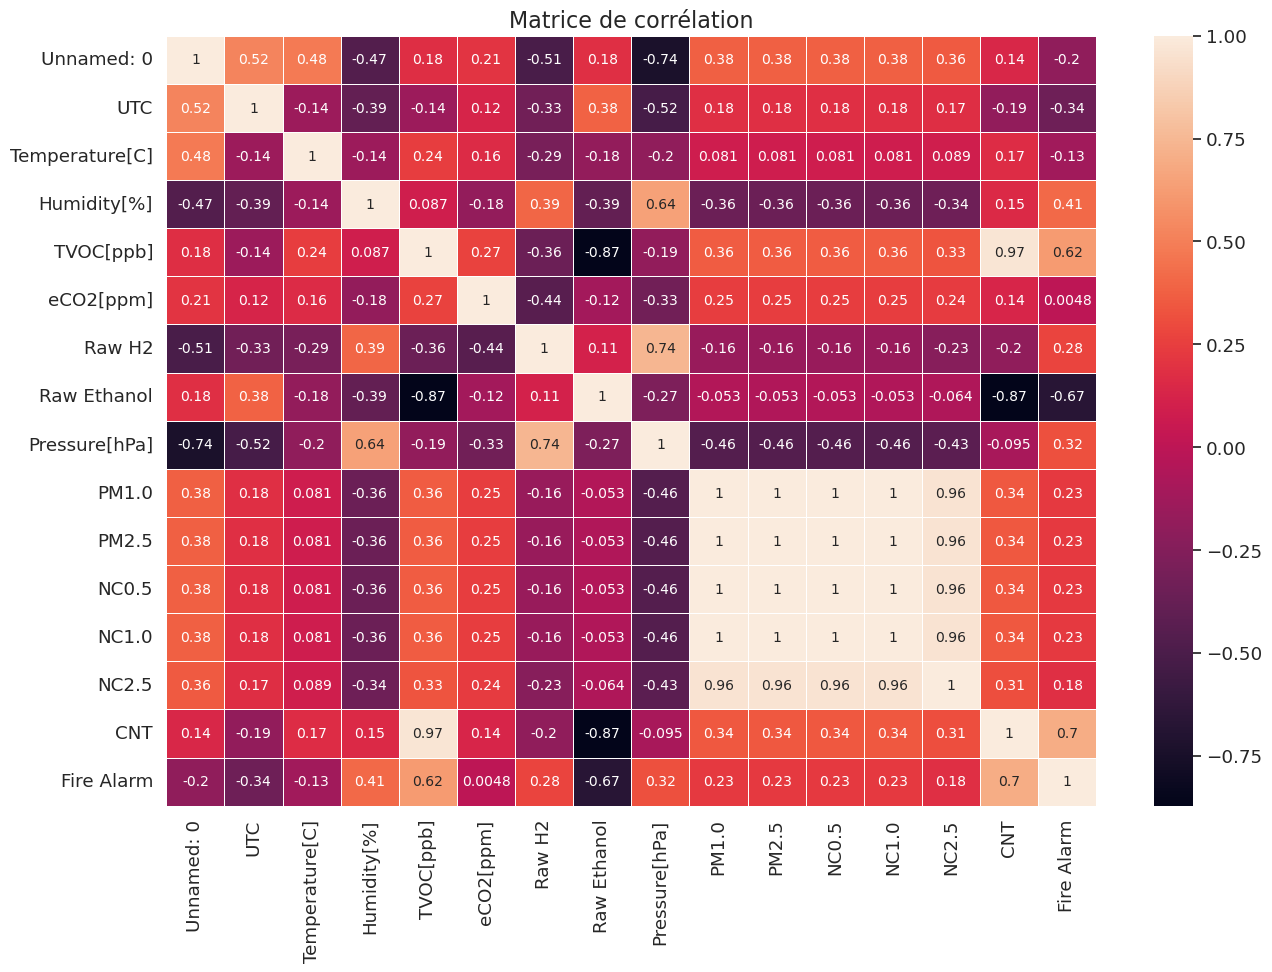

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data = pd.read_csv("../data/processed/clean_dataset_.csv")

print(data.info())
print(data.describe())

corr = data.corr()
numerical_cols = ['Temperature[C]','Humidity[%]','TVOC[ppb]','eCO2[ppm]','Raw H2','Raw Ethanol','Pressure[hPa]','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']
plt.figure(figsize=(15, 10))
sns.set_theme(font_scale=1.2)
sns.heatmap(corr, annot=True, annot_kws={"size": 10}, linewidths=0.5)
plt.title("Matrice de corrélation", fontsize=16)  # Augmente la taille du titre
plt.show()






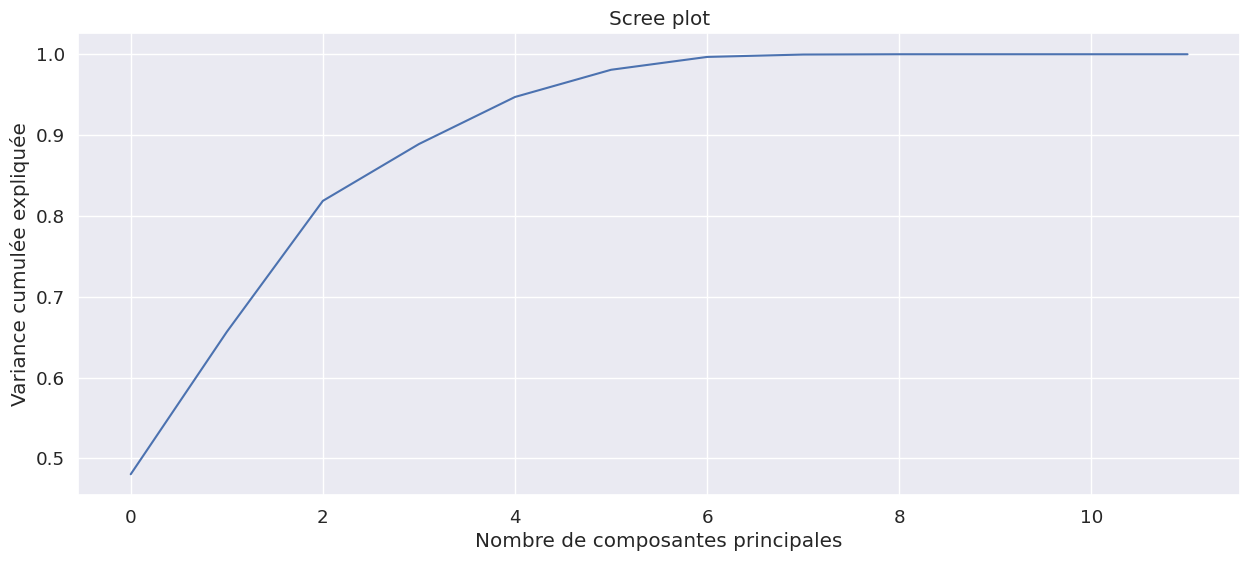

In [10]:
# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_cols])

# ACP - Calcul de toutes les composantes
pca = PCA()
principalComponents = pca.fit_transform(data_scaled)

# Variance expliquée
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(15, 6))
plt.plot(np.cumsum(explained_variance))

plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée expliquée')
plt.title('Scree plot')
plt.show()


In [18]:


# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# ACP - Choix du nombre de composantes
n_components = 3  # Vous pouvez modifier cette valeur

pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(data_scaled)

# Variance expliquée
variance_ratio = pca.explained_variance_ratio_
s= 0
# Analyse de la variance expliquée
print("Pourcentage de variance expliquée par chaque composante principale :")
for i, ratio in enumerate(variance_ratio):
    print(f"Composante {i+1} : {ratio:.4f}")
    s += ratio

print(s)
print(1-s)

newComponent = pd.DataFrame(principalComponents, columns=["Composante1","Composante2","Composante3"])
newComponent.to_csv("../data/processed/principalComponents_.csv", index=False)
principalComponents


Pourcentage de variance expliquée par chaque composante principale :
Composante 1 : 0.3968
Composante 2 : 0.2372
Composante 3 : 0.1409
0.7749495486145304
0.22505045138546964


array([[-3.16621617,  0.62848325, -1.62116701],
       [-4.06012045,  0.61669776, -2.12523486],
       [-4.17010414,  0.61848101, -2.15675174],
       ...,
       [ 1.50303996,  4.80384714,  1.81995828],
       [ 0.64717396,  4.87444053,  1.05032135],
       [ 0.66175085,  4.87316046,  0.99702412]])